No GPU available, using the CPU
В наборе предложений: 1,441

Максимальная длина предложения:  1627
Предложений длиннее 64 токена:  190


C:\Users\Vanya\anaconda3\lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(



Эпоха 1 из 4 
 Батч   10 из  324. Затраченное время: 00:00:29. Ошибка: 2.273017406463623.
 Батч   20 из  324. Затраченное время: 00:00:55. Ошибка: 0.5320193767547607.
 Батч   30 из  324. Затраченное время: 00:01:20. Ошибка: 0.6140555143356323.
 Батч   40 из  324. Затраченное время: 00:01:45. Ошибка: 0.6311876177787781.
 Батч   50 из  324. Затраченное время: 00:02:10. Ошибка: 0.5984649658203125.
 Батч   60 из  324. Затраченное время: 00:02:35. Ошибка: 0.7693603038787842.
 Батч   70 из  324. Затраченное время: 00:02:59. Ошибка: 0.8234623670578003.
 Батч   80 из  324. Затраченное время: 00:03:24. Ошибка: 1.0299198627471924.
 Батч   90 из  324. Затраченное время: 00:03:49. Ошибка: 0.7441975474357605.
 Батч  100 из  324. Затраченное время: 00:04:14. Ошибка: 0.6985324621200562.
 Батч  110 из  324. Затраченное время: 00:04:38. Ошибка: 0.6886499524116516.
 Батч  120 из  324. Затраченное время: 00:05:02. Ошибка: 0.2578735053539276.
 Батч  130 из  324. Затраченное время: 00:05:27. Ошибка: 0.628

 Батч   60 из  324. Затраченное время: 00:02:27. Ошибка: 0.5810228586196899.
 Батч   70 из  324. Затраченное время: 00:02:51. Ошибка: 0.31337493658065796.
 Батч   80 из  324. Затраченное время: 00:03:15. Ошибка: 0.5163186192512512.
 Батч   90 из  324. Затраченное время: 00:03:39. Ошибка: 0.5010719299316406.
 Батч  100 из  324. Затраченное время: 00:04:03. Ошибка: 0.22985947132110596.
 Батч  110 из  324. Затраченное время: 00:04:27. Ошибка: 0.5804225206375122.
 Батч  120 из  324. Затраченное время: 00:04:51. Ошибка: 0.838504433631897.
 Батч  130 из  324. Затраченное время: 00:05:14. Ошибка: 0.5485562086105347.
 Батч  140 из  324. Затраченное время: 00:05:39. Ошибка: 0.5896535515785217.
 Батч  150 из  324. Затраченное время: 00:06:02. Ошибка: 0.8476449251174927.
 Батч  160 из  324. Затраченное время: 00:06:26. Ошибка: 0.43970417976379395.
 Батч  170 из  324. Затраченное время: 00:06:50. Ошибка: 0.41628867387771606.
 Батч  180 из  324. Затраченное время: 00:07:14. Ошибка: 0.46648722887039

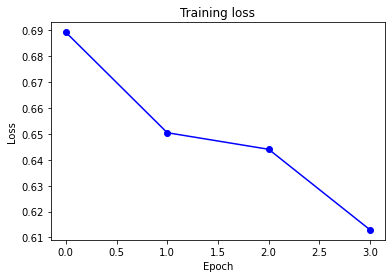

OSError: Error no file named pytorch_model.bin, model.safetensors, tf_model.h5, model.ckpt.index or flax_model.msgpack found in directory ./model_save_toxic/.

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Dec  9 14:27:26 2024

@author: Vanya
"""
# pip install tensorflow
# pip install tensorflow-gpu
# pip install transformers
# pip install kernel
import torch
import numpy as np
import os
import pandas as pd


# Проверяем доступна ли GPU и задаем вычислительное устройство
if torch.cuda.is_available():    
    device = torch.device("cuda")
    print('Available GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU')
    device = torch.device("cpu")


# В работе используется набор Russian Language Toxic Comments Dataset https://www.kaggle.com/blackmoon/russian-language-toxic-comments
# комментариев с сайтов Двач и Пикабу. 
# он опубликован  в 2019 году и содержит 14 412 комментариев
# 4 826 из них помечены как токсичные, а 9 586 — как нетоксичные

# Загрузка данных реализована на основе pandas dataframe
df = pd.read_csv("data/labeled_rutoxic.csv", delimiter=',', header=0, names=['sentence', 'label'])

# Выбираем 10% случайных значений
df = df.sample(frac=0.1, random_state=42)

print('В наборе предложений: {:,}\n'.format(df.shape[0]))

# Пример
df.sample(10)

# Нас интересуют метки классов и сами предложения, на них мы будем обучать нашу сеть
sentences = df.sentence.values
labels = df.label.values

# Следующий этап - токенизация - разбиение предложений на слова
from transformers import BertTokenizer

# Используем BERT tokenizer, но созданный на основе словаря
tokenizer = BertTokenizer('data/vocab_rutoxic.txt', do_lower_case=True, do_basic_tokenize=True, never_split=None)

##### размер нового словаря
tokenizer.vocab_size

# максимальный размер предложения существенно вырос
sl = [len(tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sen))) for sen in sentences]
print('Максимальная длина предложения: ', max([len(tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sen))) for sen in sentences]))

# посмотрим сколько предложений имеет длину более 64 символа
value_c = pd.Series(sl).value_counts()
print('Предложений длиннее 64 токена: ', sum(value_c[64:]))

# довольно много, но придется ими пожертвовать
# будем их обрезать

input_ids = np.zeros((len(sentences),64))

# Каждое предложение энкодится по отдельности
for s,i in zip(sentences,range(len(sentences))):
    enc_s = tokenizer.encode(s,                      
                        add_special_tokens = True, # У казываем, что нам нужно добавить служебные токены
                        padding = 'max_length',  # дополнение до макс.длины
                        max_length = 64,         # максимальная длина предложений
                        truncation = True        # все что длиннее max_length будет обрезаться
                   )
    # Формируем список id токенов
    input_ids[i,]=enc_s


# Создаем attention mask для виртуальных токенов
attention_masks = []

for s in input_ids:
    #   Если ID = 0, это виртуальный токен и маска для него 0.
    #   Если ID > 0, это реальный токен и маска для него 1.
    att_mask = [int(id_ > 0) for id_ in s]
    attention_masks.append(att_mask)


# Формируем тестовый и валидационный набор
from sklearn.model_selection import train_test_split

# разбиваем данные, метки классов
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, test_size=0.1)
# и маску
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels, test_size=0.1)

# все конвертируем в тензоры
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

# теперь можно создавать Dataset и DataLoader
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# размер батча придется уменьшить (если на GPU), т.к. за счет
# увеличившегося словаря выросла и модель 
batch_size = 4

# Пакуем в тренировочный предложения (ID), маску и метки классов
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# и в валидационный
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)


# теперь можно переходить к заданию модели

from transformers import BertForSequenceClassification, AdamW, PretrainedConfig, BertConfig

# Загрузка теперь делается через конфигурационный файл, в котором изменен размер словаря
configuration = BertConfig.from_pretrained('data/config_rutoxic.json')
model = BertForSequenceClassification(configuration)

# Отправляем модель на GPU
if torch.cuda.is_available():
    model.cuda()

# Задаем оптимизатор
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # скорость обучения
                  eps = 1e-8 # специфический параметр, повышающий стабильность обучения
                )

from transformers import get_linear_schedule_with_warmup

# Количество эпох обучения
epochs = 4

# Шагов обучения = number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# scheduler - планировщик изменяющий скорость обучения
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 0, num_training_steps = total_steps)

# функция вычисления точности обучения
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)


import time
import datetime
import random

# Задаем seed
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Тут храним наши лоссы
loss_values = []

# Цикл обучения будет состоять из обучения и валидации
for epoch_i in range(0, epochs):
    
    ################ Часть обучения #####################
    
    print("")
    print('Эпоха {:} из {:} '.format(epoch_i + 1, epochs))
    
    t0 = time.time()

    # потери за эпоху
    total_loss = 0
    
    # переключаем в режим обучения
    model.train()

    # пробегаем по батчам
    for step, batch in enumerate(train_dataloader):

       
        # Достаем из батча данные: предложения, маску и метки
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # обнуляем градиенты
        model.zero_grad()        

        # прямой проход
        outputs = model(b_input_ids.to(torch.long), 
                    token_type_ids=None, 
                    attention_mask=b_input_mask.to(torch.long), 
                    labels=b_labels.to(torch.long))
       
               # потери
        loss = outputs.loss
        total_loss += loss.item()

        # обратный проход
        loss.backward()

        # обрезаем градиенты до 1.0, чтобы предотвратить "взрыв градиентов"
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # обновляем параметры модели
        optimizer.step()

        # изменяем скорость обучения
        scheduler.step()
        
         # диагностическую информацию выводим каждые 10 батчей
        if step % 10 == 0 and not step == 0:
            time_elapsed = time.strftime("%H:%M:%S", time.gmtime(time.time() - t0))
            print(' Батч {:>4,} из {:>4,}. Затраченное время: {:}. Ошибка: {:}.'.format(step, len(train_dataloader), time_elapsed, loss))


    # средний loss 
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # сохраним для графика
    loss_values.append(avg_train_loss)

    print("")
    print(" Средний loss: {0:.2f}".format(avg_train_loss))
    print(" Обучение эпохи прошло за: {:}".format(time.strftime("%H:%M:%S", time.gmtime(time.time() - t0))))

    ################ Часть валидации #####################
    # Позволяет понять правильно ли мы учимся и учимся ли вообще

    print("\n Validation...")
    t0 = time.time()

    # модель в  evaluation режим
    model.eval()

    # диагностические переменные
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # пробегаем валидационный набор
    for batch in validation_dataloader:
        
        batch = tuple(t.to(device) for t in batch)
        
        # берем нужные данные из батча
        b_input_ids, b_input_mask, b_labels = batch
        
        with torch.no_grad():        
            # прямой проход
            outputs = model(b_input_ids.to(torch.long), 
                    token_type_ids=None, 
                    attention_mask=b_input_mask.to(torch.long), 
                    labels=b_labels.to(torch.long))
        
        # "logits" хранят вероятности классов похоже на softmax
        logits = outputs.logits

        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # считаем точность модели на валидации
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # суммарная точность
        eval_accuracy += tmp_eval_accuracy

        # сколько батчей прошло
        nb_eval_steps += 1

    # результат валидации
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Валидация прошла за: {:}".format(time.strftime("%H:%M:%S", time.gmtime(time.time() - t0))))



# Можно построить график обучения 
import matplotlib.pyplot as plt

plt.plot(loss_values, 'b-o')
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()




In [15]:
# # Загрузим предобученную модель
# model_dir = 'model_save_toxic'
# model = BertForSequenceClassification.from_pretrained(model_dir)
# tokenizer = BertTokenizer.from_pretrained(model_dir)

# configuration = BertConfig.from_pretrained('data/config_rutoxic.json')
# model = BertForSequenceClassification(configuration)

OSError: Error no file named pytorch_model.bin, model.safetensors, tf_model.h5, model.ckpt.index or flax_model.msgpack found in directory model_save_toxic.

In [28]:
model.to(device)


# Проверим как оно работает
sentence = 'чурки'
# sentence = 'Ну, посмотрел я комментарии к твоим постам, процент говнокомментов ниже средней отметки.'
enc_s = tokenizer.encode(sentence,                      
                        add_special_tokens = True, # У казываем, что нам нужно добавить служебные токены
                        padding = 'max_length',  # дополнение до макс.длины
                        max_length = 64,         # максимальная длина предложений
                        truncation = True        # все что длиннее max_length будет обрезаться
                   )

# Формируем список id токенов
input_ids = np.array(enc_s)

# Создаем attention mask для виртуальных токенов
attention_mask = [int(id_ > 0) for id_ in input_ids]

model.eval()
batch = tuple(t.to(device) for t in torch.Tensor([input_ids, attention_mask]))
b_input_ids, b_input_mask = batch
with torch.no_grad():
    outputs = model( b_input_ids.unsqueeze(0).to(torch.long), token_type_ids=None, attention_mask=b_input_mask.unsqueeze(0))
    
logits = outputs.logits
logits = logits.detach().cpu().numpy()
predicted_label = np.argmax(logits, axis=1).flatten()
print(predicted_label)

[1]
